# Urban Inequality Dynamics: Global Analysis of Metropolitan Income Distribution Patterns

**Understanding Urban Economic Disparities**: Income inequality within metropolitan areas represents one of the most pressing challenges of modern urban development, reflecting the complex interplay between economic growth, social mobility, and policy effectiveness. This analysis examines Gini coefficient data across global cities to understand how income distribution patterns vary across countries, cities, and time periods, revealing critical insights into urban economic justice and sustainable development outcomes.

**Analytical Framework for Inequality Assessment**: Through comprehensive examination of city-level Gini coefficients spanning multiple years and countries, we can identify patterns of increasing or decreasing inequality, understand which urban centers maintain more equitable income distributions, and assess the effectiveness of different national approaches to managing urban economic disparities. This multi-dimensional analysis provides essential intelligence for urban policy design, international development strategy, and understanding the social sustainability of metropolitan economic growth.

In [95]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

In [96]:
# only run this with the above cells, other issues present. 
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# melt data so years are rows not columns 
gini_disposable = gini_disposable.melt(id_vars=["Country", "City/region"], var_name="Year", value_name="Gini")

# convert ".." to proper nulls, then coerce to numeric
gini_disposable = gini_disposable[gini_disposable["Gini"] != ".."]
gini_disposable["Gini"] = pd.to_numeric(gini_disposable["Gini"], errors="coerce")

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access'
})

In [97]:
x = gini_disposable
display(x.sample(6))
x.info()

,Country,City/region,Year,Gini
910,Kazakhstan,West Kazakhstan,2014,0.267
1216,United States,Guilford,2015,0.390
1350,Kazakhstan,East Kazakhstan,2016,0.279
438,Angola,Luanda,2011,0.500
1392,Colombia,Sincelejo,2016,0.459
261,Colombia,Ibagué,2011,0.449


<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 1626
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      730 non-null    object 
 1   City/region  730 non-null    object 
 2   Year         730 non-null    object 
 3   Gini         726 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.5+ KB


## Data Architecture: Gini Coefficient Dataset Transformation & Quality Framework

**Longitudinal Data Restructuring**: The Gini coefficient dataset required sophisticated preprocessing to transform wide-format time series data into analyzable long-format structure, enabling temporal analysis across cities and countries. The data cleaning process involved systematic handling of missing values (represented as ".." in the original dataset), proper numeric conversion of inequality measurements, and preservation of geographic hierarchies linking cities to their national contexts.

**Data Quality & Temporal Coverage**: The dataset provides Gini coefficient measurements across multiple years for cities within various countries, though coverage varies significantly by geographic region and time period. Understanding these coverage patterns is essential for interpreting analytical results, as countries with more comprehensive data collection may appear to have different inequality trends simply due to measurement consistency rather than actual policy effectiveness or economic conditions.

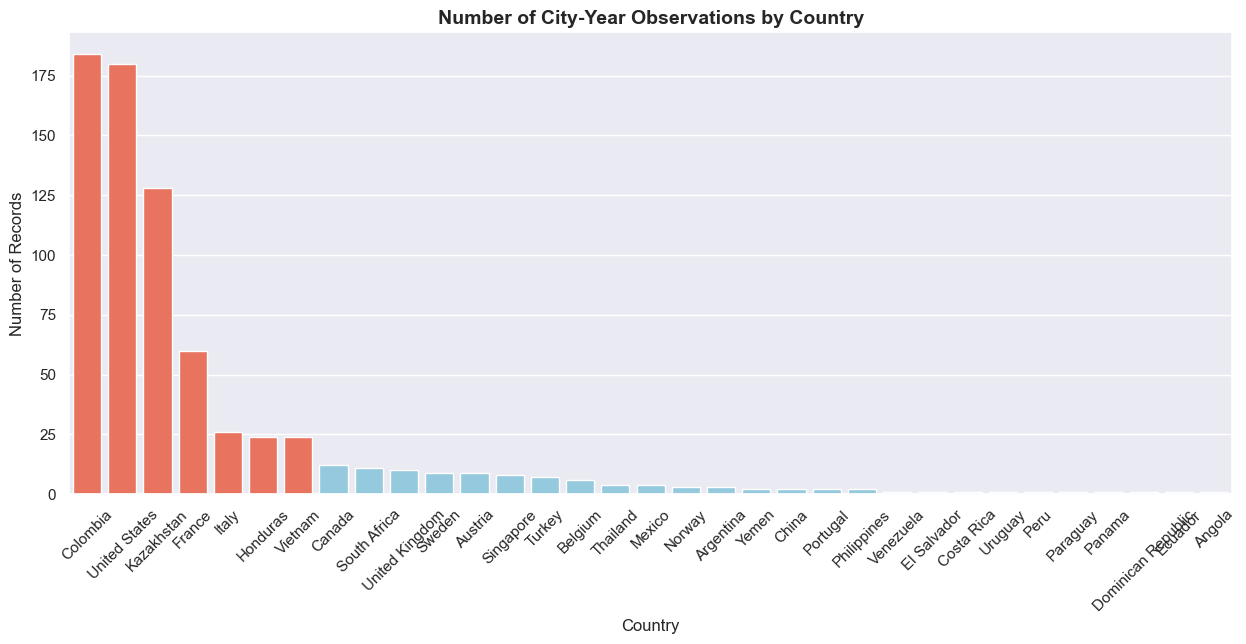

<Figure size 1500x600 with 0 Axes>

In [99]:
# copy data for simplicity
df = gini_disposable.copy()

# build the plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 6))

# colour themes
country_counts = gini_disposable["Country"].value_counts()

# Build palette mapping
palette_dict = {
    country: "tomato" if count > 20 else "skyblue"
    for country, count in country_counts.items()
}

plt.figure(figsize=(15, 6))
sns.countplot(
    data=gini_disposable,
    x="Country",
    hue="Country",          
    palette=palette_dict,   
    order=country_counts.index,
    legend=False, 
    ax=ax
)

ax.set_title("Number of City-Year Observations by Country", fontsize=14, weight="bold")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Records")
ax.tick_params(axis='x', rotation=45)
plt.show()

## National Data Coverage Assessment: Understanding Geographic Representation Patterns

**Country-Level Data Density Analysis**: The visualization of observation counts by country reveals significant disparities in data collection intensity and urban monitoring capabilities across nations. Countries with extensive city-year observations (highlighted in red) demonstrate robust statistical infrastructure and commitment to urban inequality monitoring, while those with limited data points may face capacity constraints or prioritize different measurement approaches for tracking social and economic outcomes.

**Implications for Comparative Analysis**: Understanding data coverage patterns is crucial for interpreting cross-country inequality comparisons, as nations with more comprehensive monitoring may appear to have more variable or concerning inequality trends simply due to measurement thoroughness. This analysis helps identify which countries provide sufficient data density for robust longitudinal analysis versus those requiring more cautious interpretation due to sparse temporal or geographic coverage.

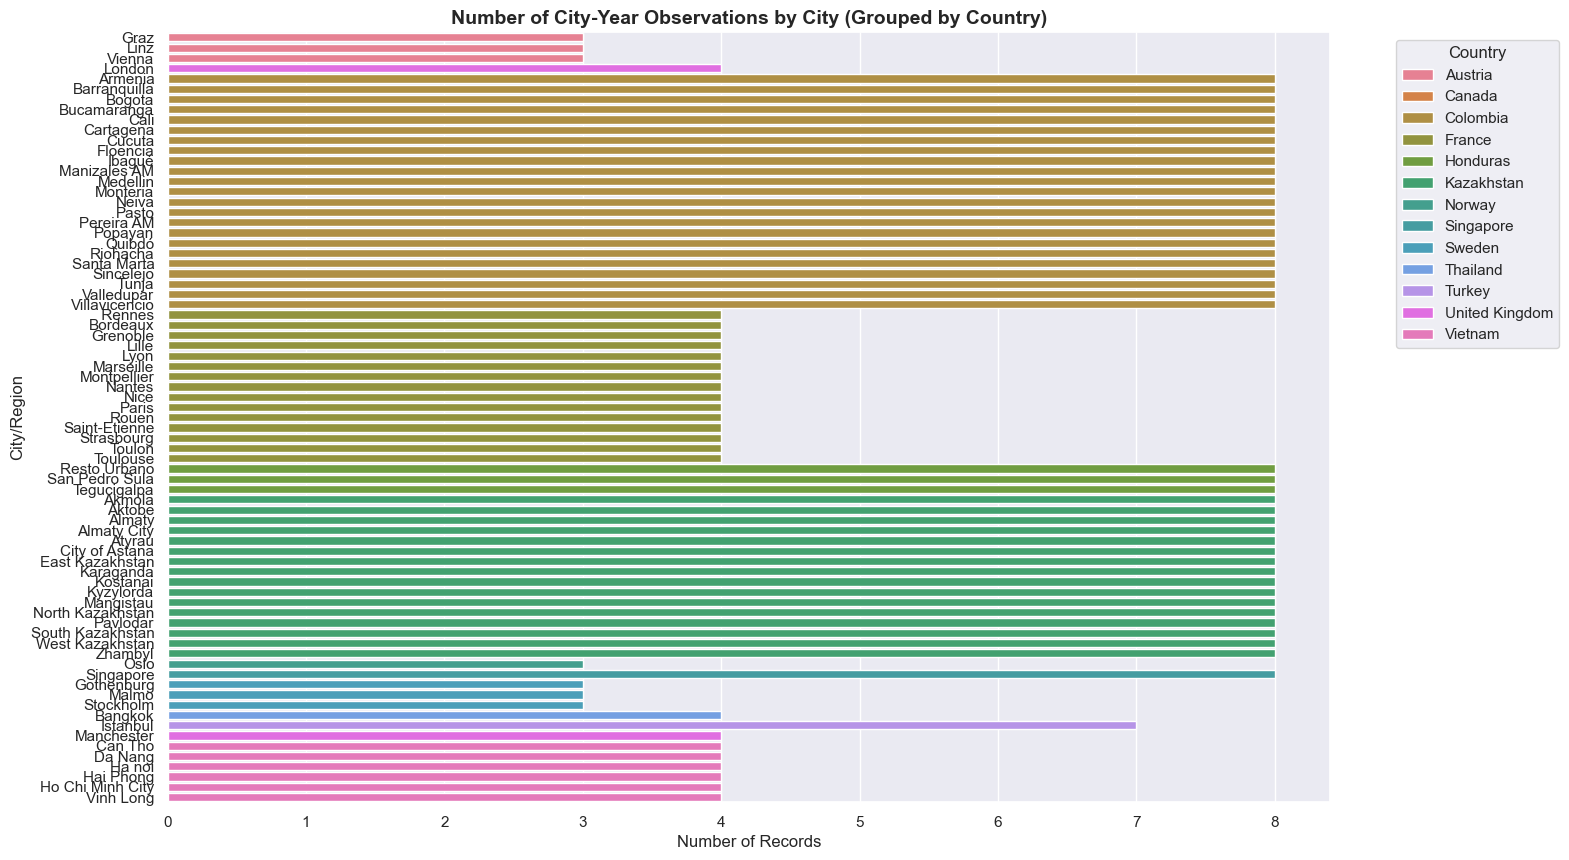

In [103]:
df_filtered = gini_disposable.copy()

# Only cities with at least 3 records
city_counts = df_filtered["City/region"].value_counts()
cities_to_keep = city_counts[city_counts >= 3].index
df_filtered = df_filtered[df_filtered["City/region"].isin(cities_to_keep)]

# Aggregate counts per city and keep country info
city_country_counts = (
    df_filtered.groupby(["Country", "City/region"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Country", "Count"], ascending=[True, False])
)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(
    data=city_country_counts,
    y="City/region",
    x="Count",
    hue="Country",
    dodge=False,
    ax=ax
)

ax.set_title("Number of City-Year Observations by City (Grouped by Country)", fontsize=14, weight="bold")
ax.set_xlabel("Number of Records")
ax.set_ylabel("City/Region")
ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## City-Level Monitoring Intensity: Identifying Consistently Tracked Urban Centers

**Temporal Consistency in Urban Measurement**: The city-level analysis reveals which metropolitan areas have sustained inequality monitoring over multiple time periods, providing insight into both data collection priorities and urban development focus areas within different countries. Cities with consistent multi-year observations represent valuable case studies for understanding inequality trends, while those with sporadic data may reflect measurement challenges or shifting policy priorities.

**Geographic Clustering and Policy Implications**: The distribution of well-documented cities across countries reveals patterns of urban monitoring capacity and policy focus. Countries with multiple cities showing consistent data collection demonstrate comprehensive national urban policy frameworks, while those with concentrated measurement in few cities may indicate either resource constraints or strategic focus on major metropolitan areas as inequality policy laboratories.

In [87]:
full_coverage_counts = (
    gini_disposable.groupby(["Country", "City/region"])
    .size()
    .reset_index(name="RecordCount")
    .query("RecordCount == 8")
    .groupby("Country")
    .size()
    .reset_index(name="FullCoverageCities")
    .sort_values("FullCoverageCities", ascending=False)
)

print(full_coverage_counts)


      Country  FullCoverageCities
0    Colombia                  23
2  Kazakhstan                  16
1    Honduras                   3
3   Singapore                   1


## Complete Temporal Coverage: Identifying Gold Standard Urban Monitoring

**Full-Spectrum Data Collection Assessment**: The analysis of cities with complete temporal coverage (8 years of data) identifies urban centers and countries with gold standard inequality monitoring capabilities. These locations represent the most reliable sources for understanding long-term inequality trends and provide the strongest foundation for evidence-based policy evaluation and international best practice identification.

**Strategic Value of Comprehensive Monitoring**: Countries with multiple cities showing complete temporal coverage demonstrate sustained commitment to urban inequality measurement and likely possess the institutional capacity for effective policy intervention. These nations serve as natural laboratories for understanding the relationship between policy interventions and inequality outcomes, providing valuable intelligence for international development strategies and urban policy design frameworks.

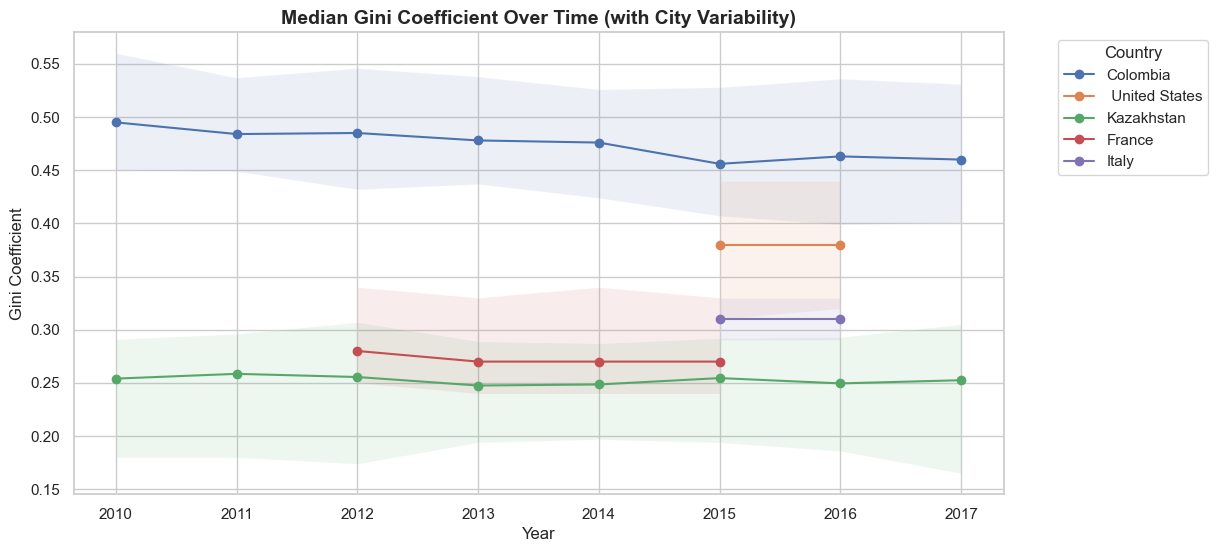

In [104]:
# Ensure Gini is numeric
df = gini_disposable.copy()
df["Gini"] = pd.to_numeric(df["Gini"], errors="coerce")

# Aggregate: median & spread per country-year
gini_trends = (
    df.groupby(["Country", "Year"])["Gini"]
    .agg(median_gini="median", min_gini="min", max_gini="max")
    .reset_index()
)

# Pick top N countries by number of records
top_countries = (
    df["Country"].value_counts().head(5).index
)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

for country in top_countries:
    country_data = gini_trends[gini_trends["Country"] == country]
    ax.plot(country_data["Year"], country_data["median_gini"], marker="o", label=country)
    ax.fill_between(
        country_data["Year"],
        country_data["min_gini"],
        country_data["max_gini"],
        alpha=0.1
    )

ax.set_title("Median Gini Coefficient Over Time (with City Variability)", fontsize=14, weight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Gini Coefficient")
ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


## Temporal Inequality Dynamics: Cross-National Trends and Policy Intelligence

**Longitudinal Inequality Pattern Analysis**: The temporal trends visualization reveals how income inequality has evolved across countries over time, with median Gini coefficients showing national central tendencies while variability bands demonstrate within-country urban diversity. Countries showing declining inequality trends indicate successful policy interventions or favorable economic conditions, while those with increasing trends may require targeted urban policy reforms or face structural economic challenges.

**Strategic Policy Intelligence and Global Implications**: Understanding cross-national inequality trajectories provides critical intelligence for international development strategy, urban policy design, and economic partnership decisions. Countries demonstrating consistent inequality reduction across their urban centers offer valuable policy templates, while those with persistent or growing inequality may represent either intervention opportunities or cautionary examples. The variability bands additionally reveal whether national inequality patterns are uniform across cities or reflect significant within-country urban diversity, informing both national policy design and international comparative analysis frameworks.